¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


## Inicialización

In [75]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import plotly.express as px
import seaborn as sns
from scipy.stats import levene

## Cargar datos

In [76]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv("/datasets/megaline_calls.csv") 
internet = pd.read_csv("/datasets/megaline_internet.csv") 
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Preparar los datos

A continuación se hará una revisión general de las datas necesarias para el análisis requerido. Lo anterior se realizará con el objetivo de observar si existen valores perdidos, duplicados o variables catalogadas de manera incorrecta. Luego de ello se procederá al análisis estadístico.

## Tarifas

In [77]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()
plans.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


0

In [78]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Es posible observar que la data tiene 8 variables, siendo 7 numéricas y dos categóricas. Adicionalmente 2 de las variables numéricas son continuas, siendo el resto discretas. No se observan valores perdidos. De manera general, emplearía otro orden para expresar la data, posicionando en la primera columna el nombre de los planes y en la segunda, el monto mensual de cada plan. 

## Corregir datos

Se cambiará el orden de la variable *plan_name* para que sea la primera variable de la data a analizar. Además, se cambiará el nombre de la variable *plan_name* para, posteriormente, poder unirla a las demás datas.

In [79]:
column_order = [7, 3, 0, 1, 2, 4, 5, 6]
plans = plans.iloc[:, column_order]

plans = plans.rename(columns={"plan_name":"plan"})

## Enriquecer los datos

Por el momento no se agregará nada adicional. Sin embargo, se destaca que los planes están considerados a partir de los gb utilizados, mientras que la información de los usuarios se encuentra en mb. Ante ello, la variable deberá ser transformada para homogeneizar la unidad de análisis. 

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Usuarios/as

In [80]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()
users.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

In [81]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Es posible observar que la data tiene 8 variables, siendo 6 categóricas y dos numéricas discretas. Además, se observa que en la columna *churn_date* hay 466 valores perdidos. Lo anterior expresa que 34 clientes dejaron de usar el servicio para el momento en el que se extrajeron los datos. Adicionalmente, se observa que la variable *user_id* está almacenada como número entero, pero considerendo que hace referencia a la identificación de una persona, sería mejor cambiar el tipo de variable a una categórica.

<div class="alert alert-block alert-success">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Gran trabajo con esta conclusión! Esta variable nos ayuda a identificar los usuarios que dejaron de usar el servicio.
</div>

### Corregir los datos

Se procederá con el cambio de la variable *user_id*.

In [82]:
users["user_id"] = users["user_id"].astype("object")

### Enriquecer los datos

Con el propósito de poder observar de manera diferenciada el comportamiento de los clientes actuales y que se dieron de baja, se agregará una nueva columna llamada *current_status* con los valores "active" "no active". De esa forma, podrá analizar, por ejemplo, si un plan tiene mayor porcentaje de desertores, así como los meses en los que más ocurre esto. En ese sentido, también se desagregaran las variables que indican fechas a nivel de día (*reg_day* y *churn_day*), a nivel de mes (*reg_month* y *churn_month*) y de año (*reg_year* y *churn_year*). Además, y considerando que las líneas móviles operan en Estados Unidos y que es un país federado, crearía una nueva variable para clasificar en qué Estado reside el usuario. Lo anterior lo usaría para analizar si la importancia, y por ende, la publicidad de los planes de telefonía debe adaptarse en base al Estado de residencia del usuario. Finalmente, se actualizará el tipo de variable para las columnas *reg_date* y *churn_date*, para que la información de ambas columnas se almacene como fecha.

In [83]:
current_status = []
for date in users["churn_date"]:
    if pd.isna(date):
        current_status.append("no active")
    else:
        current_status.append("active")

users["current_status"] = current_status

if not users["churn_date"].isnull().all():
    users[["churn_day", "churn_month", "churn_year"]] = users["churn_date"].str.split("-", expand=True)

users[["reg_day", "reg_month", "reg_year"]] = users["reg_date"].str.split("-", expand=True)

users["state"] = users["city"].str.split(",").str[-1].str.strip()

users["reg_date"] = pd.to_datetime(users["reg_date"],format="%Y-%m-%d")
users["churn_date"] = pd.to_datetime(users["churn_date"],format="%Y-%m-%d")

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Llamadas

In [84]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()
calls.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


0

In [85]:
# Imprime una muestra de datos para las llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Es posible observar quela data tiene 4 variables, siendo dos categóricas y dos numéricas (una discreta y una continua). No se observan valores perdidos. Se observa que la variable *user_id* está almacenada como número entero, pero considerendo que hace referencia a la identificación de una persona, sería mejor cambiar el tipo de variable a una categórica.

### Corregir los datos

Se procederá con el cambio de la variable *user_id*.

In [86]:
calls["user_id"] = calls["user_id"].astype("object")

### Enriquecer los datos

Se desagregará la variable *call_date* a nivel de día (*day*), a nivel de mes (*month*) y de año (*year*). Además, y considerando que para cada llamada individual se redondea la duración de las llamadas al entero superior, se procederá a crear una nueva variable que contenga la información final de duración. Esta variable se llamará *call_duration_final*. Finalmente, se actualizará el tipo de variable para la columna *call_date*, para que la información se almacene como fecha.

In [87]:
calls[["day", "month", "year"]] = calls["call_date"].str.split("-", expand=True)

calls["call_duration_final"] = np.ceil(calls["duration"])

calls["call_date"] = pd.to_datetime(calls["call_date"],format="%Y-%m-%d")

<div class="alert alert-block alert-success">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes de esta base de datos!
</div>

## Mensajes

In [88]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()
messages.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


0

In [89]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Es posible observar que la data tiene 3 variables, siendo 1 numérica discreta y dos categóricas. No se observan valores perdidos. Se observa que la variable *user_id* está almacenada como número entero, pero considerendo que hace referencia a la identificación de una persona, sería mejor cambiar el tipo de variable a una categórica.

### Corregir los datos

Se procederá con el cambio de la variable *user_id*.

In [90]:
messages["user_id"] = messages["user_id"].astype("object")

### Enriquecer los datos

Se desagregará la variable *message_date* a nivel de día (*day*), a nivel de mes (*month*) y de año (*year*). Además, se actualizará el tipo de variable para la columna *message_date*, para que la información se almacene como fecha.

In [91]:
messages[["day", "month", "year"]] = messages["message_date"].str.split("-", expand=True)

messages["message_date"] = pd.to_datetime(messages["message_date"],format="%Y-%m-%d")

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Internet

In [92]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()
internet.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


0

In [93]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Es posible observar que la data tiene 4 variables, siendo dos categóricas y dos numéricas (una discreta y una continua). No se observan valores perdidos. 
Se observa que la variable *user_id* está almacenada como número entero, pero considerendo que hace referencia a la identificación de una persona, sería mejor cambiar el tipo de variable a una categórica.

### Corregir los datos

Se procederá con el cambio de la variable *user_id*.

In [94]:
internet["user_id"] = internet["user_id"].astype("object")

### Enriquecer los datos

Se desagregará la variable *session_date* a nivel de día (*day*), a nivel de mes (*month*) y de año (*year*). Además, se actualizará el tipo de variable para la columna *session_date*, para que la información se almacene como fecha. Adicionalmente, más adelante se agruparán los datos y se realizará un redondeo hacia arriba en lo que respecta a los mb utilizados. 

In [95]:
internet[["day", "month", "year"]] = internet["session_date"].str.split("-", expand=True)

internet["session_date"] = pd.to_datetime(internet["session_date"],format="%Y-%m-%d")

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Cuando hacemos análisis de datos, un paso que es muy importate realizar es verificar que no se tengan duplicados en nuestras bases de datos y en caso de tener duplicados entender si hace sentido su duplicación o solamente son errores de registro. En este sentido sería importante que para todas las bases de datos desarrolles un análisis de registros duplicados.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Estudiar las condiciones de las tarifas

A continuación se mostrará la información relacionada a las tarifas de Megaline

In [96]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()

,plan,usd_monthly_pay,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
0,surf,20,50,15360,500,10,0.03,0.03
1,ultimate,70,1000,30720,3000,7,0.01,0.01


## Agregar datos por usuario

A continuación se agregarán los datos por usuario y por periodo en cada una de las datas limpiadas con anterioridad. Lo anterior se realizará con la finalidad de que solo quede un registro por usuario y por periodo.

In [97]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_month = calls.groupby(["user_id", "month"]).size().reset_index(name="num_calls")


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [98]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_minutes_month = calls.groupby(["user_id", "month"])["call_duration_final"].sum().reset_index(name="calls_minutes_month")

In [99]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_month = messages.groupby(["user_id", "month"]).size().reset_index(name="messages_month")

In [100]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_month = internet.groupby(["user_id", "month"])["mb_used"].sum().reset_index(name="internet_month")

internet_month["mb_used_month"] = np.ceil(internet_month["internet_month"])

In [101]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_month = (calls_month
                 .merge(calls_minutes_month, on=["user_id","month"], how="outer")
                 .merge(messages_month, on=["user_id","month"], how="outer")
                 .merge(internet_month, on=["user_id","month"], how="outer"))

user_month.info()
user_month.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2293 non-null   int64  
 1   month                2293 non-null   object 
 2   num_calls            2258 non-null   float64
 3   calls_minutes_month  2258 non-null   float64
 4   messages_month       1806 non-null   float64
 5   internet_month       2277 non-null   float64
 6   mb_used_month        2277 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 143.3+ KB


,user_id,month,num_calls,calls_minutes_month,messages_month,internet_month,mb_used_month
0,1000,12,16.0,124.0,11.0,1901.47,1902.0
1,1001,08,27.0,182.0,30.0,6919.15,6920.0
2,1001,09,49.0,315.0,44.0,13314.82,13315.0
3,1001,10,65.0,393.0,53.0,22330.49,22331.0
4,1001,11,64.0,426.0,36.0,18504.30,18505.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [102]:
# Añade la información de la tarifa
data_final = (user_month
              .merge(users, on=["user_id"], how="left")
              .merge(plans, on=["plan"], how="left"))

columns = [0, 12] + list(range(1, 5)) + [6] + [21] + list(range(22, 29))
data_final = data_final.iloc[:, columns]

data_final.info()
data_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   object 
 1   plan                   2293 non-null   object 
 2   month                  2293 non-null   object 
 3   num_calls              2258 non-null   float64
 4   calls_minutes_month    2258 non-null   float64
 5   messages_month         1806 non-null   float64
 6   mb_used_month          2277 non-null   float64
 7   state                  2293 non-null   object 
 8   usd_monthly_pay        2293 non-null   int64  
 9   messages_included      2293 non-null   int64  
 10  mb_per_month_included  2293 non-null   int64  
 11  minutes_included       2293 non-null   int64  
 12  usd_per_gb             2293 non-null   int64  
 13  usd_per_message        2293 non-null   float64
 14  usd_per_minute         2293 non-null   float64
dtypes: f

,user_id,plan,month,num_calls,calls_minutes_month,messages_month,mb_used_month,state,usd_monthly_pay,messages_included,mb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
0,1000,ultimate,12,16.0,124.0,11.0,1902.0,GA MSA,70,1000,30720,3000,7,0.01,0.01
1,1001,surf,08,27.0,182.0,30.0,6920.0,WA MSA,20,50,15360,500,10,0.03,0.03
2,1001,surf,09,49.0,315.0,44.0,13315.0,WA MSA,20,50,15360,500,10,0.03,0.03
3,1001,surf,10,65.0,393.0,53.0,22331.0,WA MSA,20,50,15360,500,10,0.03,0.03
4,1001,surf,11,64.0,426.0,36.0,18505.0,WA MSA,20,50,15360,500,10,0.03,0.03


A continuación se calculará el costo mensual de cada usuario por mes.

In [103]:
# Calcula el ingreso mensual para cada usuario

#1. Calcular excedentes
data_final["excess_minutes"] = (data_final["calls_minutes_month"] - data_final["minutes_included"]).clip(lower=0)
data_final["excess_messages"] = (data_final["messages_month"] - data_final["messages_included"]).clip(lower=0)
data_final["excess_gb"] = ((data_final["mb_used_month"] - data_final["mb_per_month_included"])/1024).clip(lower=0)
data_final["excess_gb"]  = np.ceil(data_final["excess_gb"])

#2. Calcular costo por excedentes
data_final["cost_excess_minutes"] = data_final["excess_minutes"] * data_final["usd_per_minute"]
data_final["cost_excess_messages"] = data_final["excess_messages"] * data_final["usd_per_message"]
data_final["cost_excess_gb"] = data_final["excess_gb"] * data_final["usd_per_gb"]

#3. Calcular el costo total por usuario y por mes
data_final["final_cost"] = data_final["usd_monthly_pay"] + data_final["cost_excess_minutes"] + data_final["cost_excess_messages"] + data_final["cost_excess_gb"]

data_final = data_final.dropna()

data_final.head(100)

,user_id,plan,month,num_calls,calls_minutes_month,messages_month,mb_used_month,state,usd_monthly_pay,messages_included,...,usd_per_gb,usd_per_message,usd_per_minute,excess_minutes,excess_messages,excess_gb,cost_excess_minutes,cost_excess_messages,cost_excess_gb,final_cost
0,1000,ultimate,12,16.0,124.0,11.0,1902.0,GA MSA,70,1000,...,7,0.01,0.01,0.0,0.0,0.0,0.00,0.00,0.0,70.00
1,1001,surf,08,27.0,182.0,30.0,6920.0,WA MSA,20,50,...,10,0.03,0.03,0.0,0.0,0.0,0.00,0.00,0.0,20.00
2,1001,surf,09,49.0,315.0,44.0,13315.0,WA MSA,20,50,...,10,0.03,0.03,0.0,0.0,0.0,0.00,0.00,0.0,20.00
3,1001,surf,10,65.0,393.0,53.0,22331.0,WA MSA,20,50,...,10,0.03,0.03,0.0,3.0,7.0,0.00,0.09,70.0,90.09
4,1001,surf,11,64.0,426.0,36.0,18505.0,WA MSA,20,50,...,10,0.03,0.03,0.0,0.0,4.0,0.00,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1034,surf,08,2.0,7.0,4.0,998.0,NY-NJ-PA MSA,20,50,...,10,0.03,0.03,0.0,0.0,0.0,0.00,0.00,0.0,20.00
125,1035,surf,12,74.0,627.0,66.0,15501.0,NC-SC MSA,20,50,...,10,0.03,0.03,127.0,16.0,1.0,3.81,0.48,10.0,34.29
126,1036,ultimate,06,19.0,161.0,19.0,1450.0,CO MSA,70,1000,...,7,0.01,0.01,0.0,0.0,0.0,0.00,0.00,0.0,70.00
127,1036,ultimate,07,68.0,537.0,63.0,12117.0,CO MSA,70,1000,...,7,0.01,0.01,0.0,0.0,0.0,0.00,0.00,0.0,70.00


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Estudia el comportamiento de usuario

A continuación y con el objetivo de obtener un panorama general de la data, se analizarán los estadísticos descriptivos más importantes según tarifa. 

### Llamadas

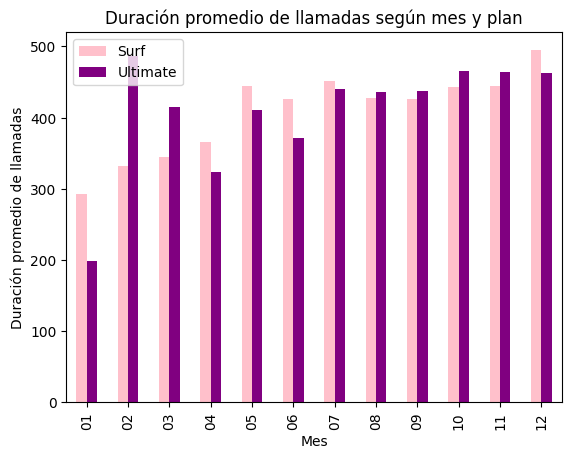

In [104]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_bar = data_final.groupby(["plan", "month"])["calls_minutes_month"].mean().reset_index()

calls_bar  = calls_bar.pivot(index="month", columns="plan", values="calls_minutes_month")

calls_bar.plot(kind = "bar",
                title = "Duración promedio de llamadas según mes y plan",
                xlabel = "Mes",
                ylabel = "Duración promedio de llamadas",
                color=["pink","purple"]            
)

plt.legend(["Surf","Ultimate"])
plt.show()

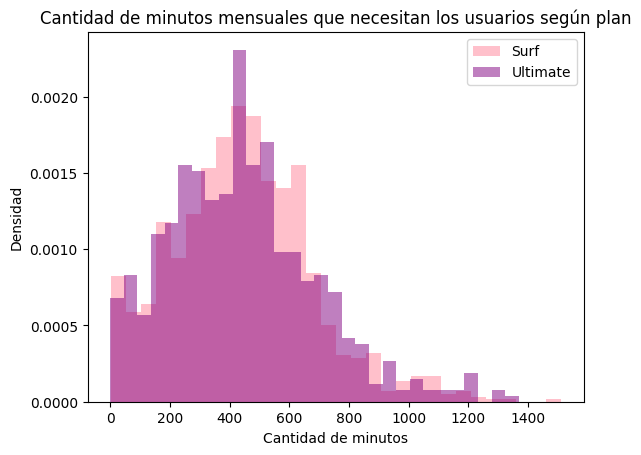

In [105]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
calls_hist = data_final

calls_hist[calls_hist["plan"]=="surf"]["calls_minutes_month"].plot(kind="hist",bins=30,density = True, color = "pink")
calls_hist[calls_hist["plan"]=="ultimate"]["calls_minutes_month"].plot(kind="hist",bins=30,density = True,alpha=0.5, color = "purple")

plt.legend(["Surf","Ultimate"])
plt.title("Cantidad de minutos mensuales que necesitan los usuarios según plan")
plt.xlabel("Cantidad de minutos")
plt.ylabel("Densidad")
plt.show()

In [106]:
# Calcula la media y la varianza de la duración mensual de llamadas.
stats_calls = data_final.groupby(["plan", "month"])["calls_minutes_month"].agg(["mean", "var"]).reset_index()
stats_calls.head()

,plan,month,mean,var
0,surf,01,292.000000,NaN
1,surf,02,331.200000,101102.200000
2,surf,03,344.937500,43077.929167
3,surf,04,366.228571,62626.652101
4,surf,05,443.981132,62096.326560


Text(0, 0.5, 'Duración mensual de las llamadas')

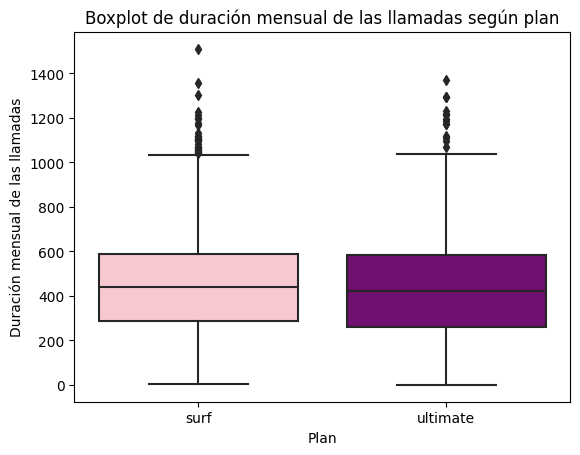

In [107]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data = data_final,
             y = "calls_minutes_month",
             x = "plan",
            order = ["surf", "ultimate"],
            palette = {"surf": "pink", "ultimate": "purple"})

plt.title("Boxplot de duración mensual de las llamadas según plan")
plt.xlabel("Plan")
plt.ylabel("Duración mensual de las llamadas")

En cuanto a las llamadas, es posible observar que en en la mayoría de los meses, los usuarios del **plan surf** suelen tener llamadas con mayor promedio de duración a comparación de los usuarios del **plan ultimate**. Sin embargo, también se observa una gran brecha en el mes de febrero a favor de los usuarios del **plan ultimate**. Cabe destacar también que, en perspectiva general, la duración promedio de las llamadas por mes suele tener un crecimiento durante el año, independientemente del plan al que esté afiliada la persona. Adicionalmente, se observa que la distribución de los usuarios de ambos planes ocurre hacia la derecha y que, por un lado, los usuarios del **plan surf** concentran la cantidad de minutos mensuales utilizados entre 200 a 400, mientras que los los usuarios del **plan ultimate** de 400 a 600. Sin embargo, también podemos observar que esta diferencia es muy poca, siendo una evidencia de ello que el 25%, el 50% y el 75% de usuarios que menos llamadas mensuales realizaron es muy parecida independientemente del plan.

### Mensajes

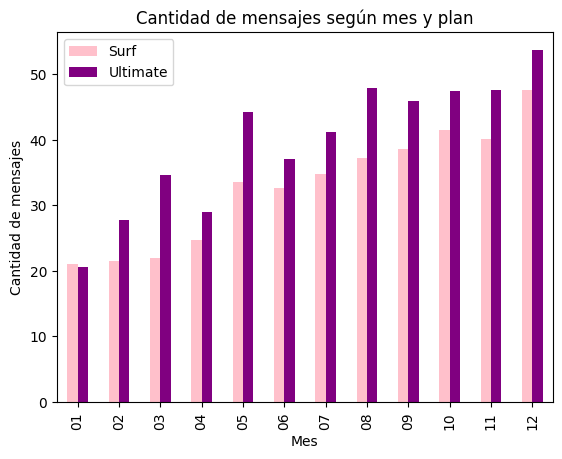

In [108]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_bar = data_final.groupby(["plan", "month"])["messages_month"].mean().reset_index()

messages_bar  = messages_bar.pivot(index="month", columns="plan", values="messages_month")

messages_bar.plot(kind = "bar",
                  title = "Cantidad de mensajes según mes y plan",
                  xlabel = "Mes",
                  ylabel = "Cantidad de mensajes",
                  color=["pink","purple"]            
)

plt.legend(["Surf","Ultimate"])
plt.show()

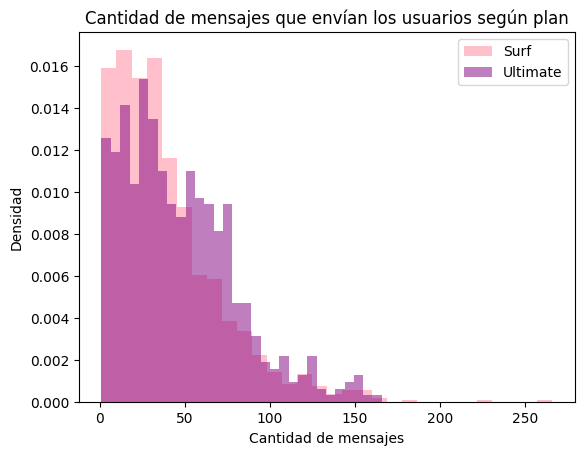

In [109]:
message_hist = data_final

message_hist[message_hist["plan"]=="surf"]["messages_month"].plot(kind="hist",bins=30,density = True, color = "pink")
message_hist[message_hist["plan"]=="ultimate"]["messages_month"].plot(kind="hist",bins=30,density = True,alpha=0.5, color = "purple")

plt.legend(["Surf","Ultimate"])
plt.title("Cantidad de mensajes que envían los usuarios según plan")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Densidad")
plt.show()

In [110]:
stats_messages = data_final.groupby(["plan", "month"])["messages_month"].agg(["mean", "var"]).reset_index()
stats_messages.head()

,plan,month,mean,var
0,surf,01,21.000000,NaN
1,surf,02,21.600000,512.800000
2,surf,03,21.937500,352.062500
3,surf,04,24.685714,539.751261
4,surf,05,33.547170,888.675617


Text(0, 0.5, 'Cantidad de mensajes enviados')

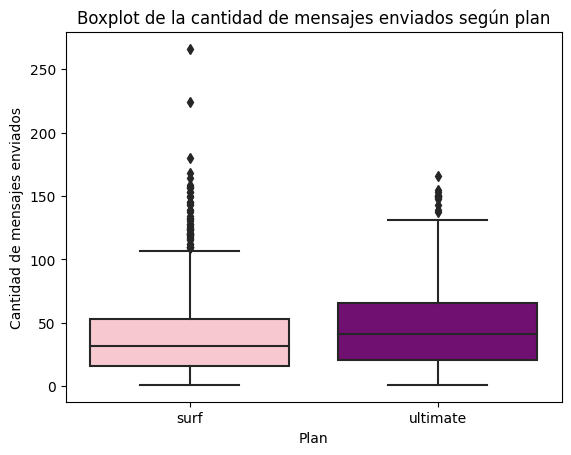

In [111]:
sns.boxplot(data = data_final,
             y = "messages_month",
             x = "plan",
            order = ["surf", "ultimate"],
            palette = {"surf": "pink", "ultimate": "purple"})

plt.title("Boxplot de la cantidad de mensajes enviados según plan")
plt.xlabel("Plan")
plt.ylabel("Cantidad de mensajes enviados")

En cuanto a los mensajes, es posible observar que los usuarios del **plan ultimate** envían una mayor cantidad de mensajes a comparación de los usuarios del **plan surf** y que la cantidad de mensajes tiende a aumentar a lo largo del año. Además, para ambos planes se observa una asimetría a la derecha, destancando que los usuarios del **plan surf** suelen enviar de 0 a 50 mensajes. En efecto, la idea anterior también se respalda en el hecho de que aproximadamente el 75% de los usuarios envía 50 mensajes mensuales como máximo.

### Internet

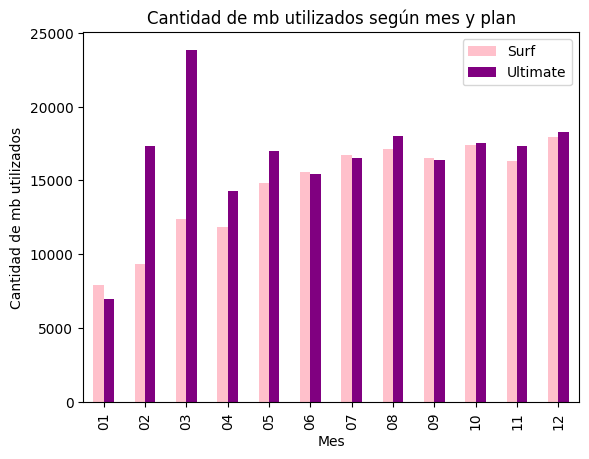

In [112]:
internet_bar = data_final.groupby(["plan", "month"])["mb_used_month"].mean().reset_index()

internet_bar = internet_bar.pivot(index="month", columns="plan", values="mb_used_month")

internet_bar.plot(kind = "bar",
                  title = "Cantidad de mb utilizados según mes y plan",
                  xlabel = "Mes",
                  ylabel = "Cantidad de mb utilizados",
                  color=["pink","purple"]            
)

plt.legend(["Surf","Ultimate"])
plt.show()

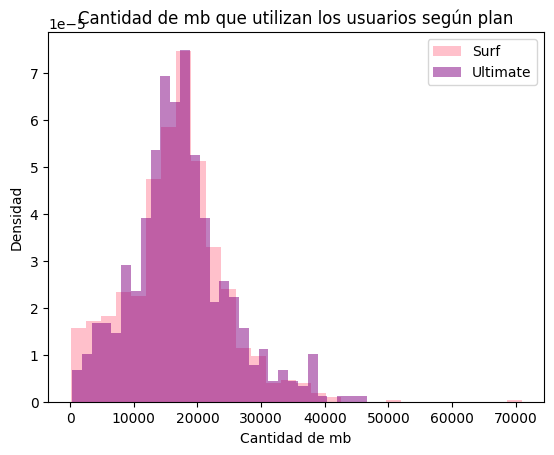

In [113]:
internet_hist = data_final

internet_hist[internet_hist["plan"]=="surf"]["mb_used_month"].plot(kind="hist",bins=30,density = True, color = "pink")
internet_hist[internet_hist["plan"]=="ultimate"]["mb_used_month"].plot(kind="hist",bins=30,density = True,alpha=0.5, color = "purple")

plt.legend(["Surf","Ultimate"])
plt.title("Cantidad de mb que utilizan los usuarios según plan")
plt.xlabel("Cantidad de mb")
plt.ylabel("Densidad")
plt.show()

In [114]:
stats_internet = data_final.groupby(["plan", "month"])["mb_used_month"].agg(["mean", "var"]).reset_index()
stats_internet.head()

,plan,month,mean,var
0,surf,01,7895.00000,NaN
1,surf,02,9311.40000,3.464589e+07
2,surf,03,12397.81250,5.483457e+07
3,surf,04,11851.60000,5.986201e+07
4,surf,05,14851.90566,5.894277e+07


Text(0, 0.5, 'Cantidad de mensajes enviados')

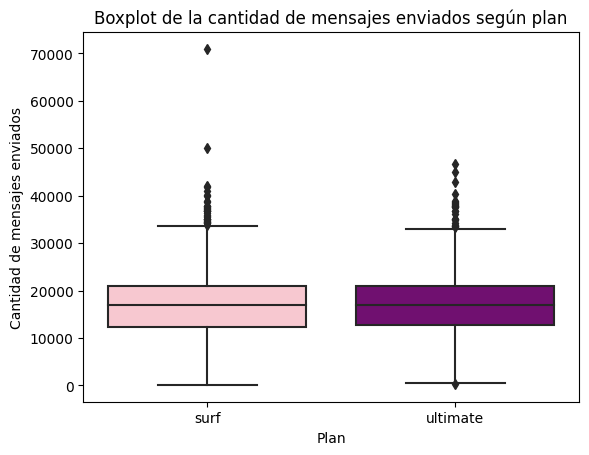

In [115]:
sns.boxplot(data = data_final,
             y = "mb_used_month",
             x = "plan",
            order = ["surf", "ultimate"],
            palette = {"surf": "pink", "ultimate": "purple"})

plt.title("Boxplot de la cantidad de mensajes enviados según plan")
plt.xlabel("Plan")
plt.ylabel("Cantidad de mensajes enviados")

En cuanto a la cantidad de mb utilizados, es posible observar que los usuarios del **plan ultimate** utilizan por lo general una mayor cantidad de mb al mes a comparación de los usuarios del **plan surf**. Sumado a lo anterior, en ambos casos de observa una distribución muy cercana a la normal, concentrándose la mayoría de usuarios entre los 10 mil y 20 mil mb utilizados por mes. En efecto, ambas distribuciones son similares.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

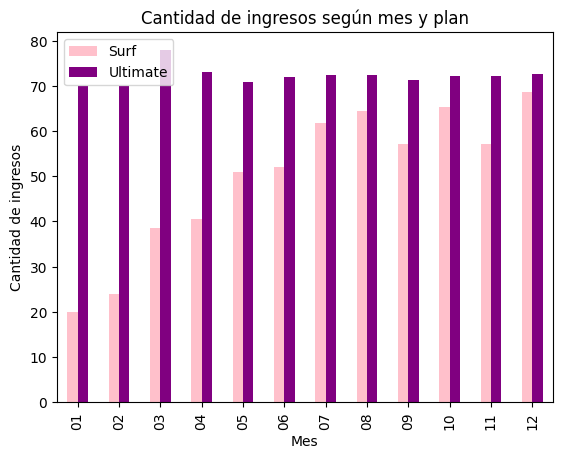

In [116]:
income_bar = data_final.groupby(["plan", "month"])["final_cost"].mean().reset_index()

income_bar = income_bar.pivot(index="month", columns="plan", values="final_cost")

income_bar.plot(kind = "bar",
                  title = "Cantidad de ingresos según mes y plan",
                  xlabel = "Mes",
                  ylabel = "Cantidad de ingresos",
                  color=["pink","purple"]            
)

plt.legend(["Surf","Ultimate"])
plt.show()

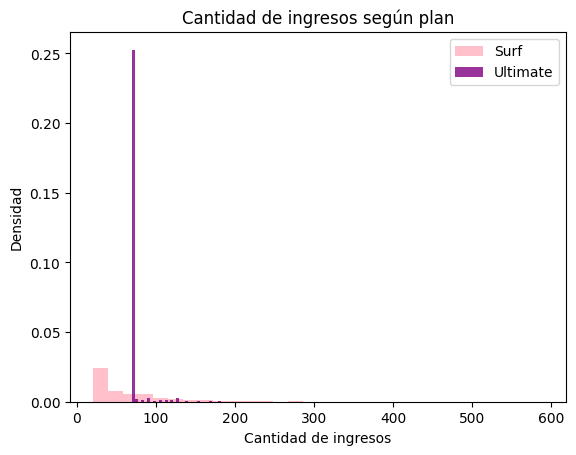

In [117]:
income_hist = data_final

income_hist[income_hist["plan"]=="surf"]["final_cost"].plot(kind="hist",bins=30,density = True, color = "pink")
income_hist[income_hist["plan"]=="ultimate"]["final_cost"].plot(kind="hist",bins=30,density = True,alpha=0.8, color = "purple")

plt.legend(["Surf","Ultimate"])
plt.title("Cantidad de ingresos según plan")
plt.xlabel("Cantidad de ingresos")
plt.ylabel("Densidad")
plt.show()

In [118]:
stats_income = data_final.groupby(["plan", "month"])["final_cost"].agg(["mean", "var"]).reset_index()
stats_income.head()

,plan,month,mean,var
0,surf,01,20.000000,NaN
1,surf,02,23.914000,28.746980
2,surf,03,38.540625,549.488006
3,surf,04,40.591429,1250.948289
4,surf,05,50.857170,2308.394898


Text(0, 0.5, 'Cantidad de ingresos')

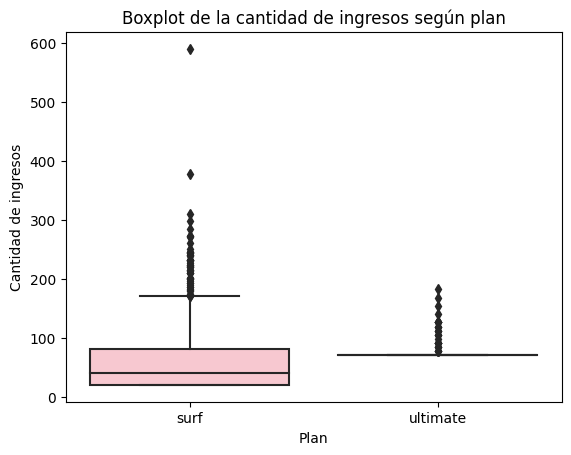

In [119]:
sns.boxplot(data = data_final,
             y = "final_cost",
             x = "plan",
            order = ["surf", "ultimate"],
            palette = {"surf": "pink", "ultimate": "purple"})

plt.title("Boxplot de la cantidad de ingresos según plan")
plt.xlabel("Plan")
plt.ylabel("Cantidad de ingresos")

En cuanto a los ingresos, es posible observar que las ganacias mensuales provenientes de **plan ultimate** siempre son superiores a las obtenidas por el **plan surf**. Empero, se destaca que los ingresos obtenidos del **plan ultimate** suelen mantenerse similares a lo largo del año, mientras que los provenientes del **plan surf** muestran una tendencia creciente a lo largo del año. Además, se observa que por lo general, los usuarios no tienden a excederse en el tiempo de llamadas, la cantidad de mensajes o de mb que les otorga el plan que adquirieron, siendo los usuarios del **plan surf** los que, en términos generales, se exceden un poco más. En efecto, es posible observar que el 75% de los usuarios del **plan ultimate** se encuentran muy concetrados en un monto de pago, mientras que la distribución del 75% de los usuarios del **plan surf** se extiende más.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

A continuación se realizá una prueba de hipótesis para analizar si existe diferencia significativa entre el ingreso promedio procedente de los usuarios del **plan ultimate** y el ingreso promedio proveniente de los usuarios del **plan surf**.

La H0 es que no existe diferencia siginificativa entre los ingresos promedios obtenidos por los usuarios del **plan ultimate** y los ingresos promedios obtenidos por los usuarios del **plan surf**. En contraste, la H1 es que sí existe diferencia significativa entre los ingresos promedios obtenidos por los usuarios del **plan ultimate** y los ingresos promedios obtenidos por los usuarios del **plan surf**.

Para poder analizar las hipótesis propuestas se empleará una Prueba T para muestras indpendientes. Adicionalmente, la prueba se realizará con un nivel de confianza del 95%, siendo el valor alpha 0.05.

La H0 que la varianza de los ingresos promedios obtenidos por lo usuarios del **plan ultimate** y que la varianza de los ingresos promedios obtenidos por los usuarios del **plan surf** son iguales. En contraste, la H1 es que la varianza de los ingresos promedios obtenidos por lo usuarios del **plan ultimate** y que la varianza de los ingresos promedios obtenidos por los usuarios del **plan surf** no son iguales. 

In [120]:
#1. Verificación de supuestos
ultimate = data_final[data_final["plan"] == "ultimate"]["final_cost"]
surf = data_final[data_final["plan"] == "surf"]["final_cost"]

stat, p_value = levene(ultimate, surf)

print("Estadístico de Levene:", stat)
print("Valor p:", p_value)

Estadístico de Levene: 339.2331337643379
Valor p: 2.0941791851303886e-69


A un 95%, siendo el p valor menor a 0.05 se rechaza la hipótesis nula.

In [315]:
# Prueba las hipótesis
#2. Prueba T
alpha = 0.05 

results = st.ttest_ind(ultimate, surf, equal_var=False)

print("valor p: ", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula")
else: 
    print("No se puede rechazar la hipótesis nula")

valor p:  5.756661975640558e-13
Se rechaza la hipótesis nula


Al 95% de confianza, siendo el p valor menor a 0.05 se rechaza la hipótesis nula y, por tanto, se afirma que sí existe diferencia significata entre los ingresos promedios que se obtienen a través de los usuarios del **plan ultimate** y los ingresos promedios que se obtienen a través de los usuarios del **plan surf**.

A continuación se realizá una prueba de hipótesis para analizar si existe diferencia significativa entre el ingreso promedio procedente de los usuarios del área **NY-NJ** y el ingreso promedio proveniente de los usuarios de otras regiones.

La H0 es que no existe diferencia siginificativa entre los ingresos promedios obtenidos por los usuarios del área **NY-NJ** y los ingresos promedios obtenidos por los usuarios de otras regiones. En contraste, la H1 es que sí existe diferencia siginificativa entre los ingresos promedios obtenidos por los usuarios del área **NY-NJ** y los ingresos promedios obtenidos por los usuarios de otras regiones.

Para poder analizar las hipótesis propuestas se empleará una Prueba T para muestras indpendientes. Adicionalmente, la prueba se realizará con un nivel de confianza del 95%, siendo el valor alpha 0.05.

La H0 que la varianza entre los ingresos promedios obtenidos por lo usuarios del área **NY-NJ** y que la varianza de los ingresos promedios obtenidos por los usuarios de otras regiones son iguales. En contraste, la H1 que la varianza entre los ingresos promedios obtenidos por lo usuarios del área **NY-NJ** y que la varianza de los ingresos promedios obtenidos por los usuarios de otras regiones no son iguales.

In [121]:
#1. Verificación de supuestos
NY_NJ = data_final[data_final["state"] == "NY-NJ-PA MSA"]["final_cost"]
other = data_final[data_final["state"] != "NY-NJ-PA MSA"]["final_cost"]

stat, p_value = levene(ultimate, surf)

print("Estadístico de Levene:", stat)
print("Valor p:", p_value)

Estadístico de Levene: 339.2331337643379
Valor p: 2.0941791851303886e-69


A un 95%, siendo el p valor menor a 0.05 se rechaza la hipótesis nula.

In [316]:
# Prueba las hipótesis
#2. Prueba T
alpha = 0.05 

results = st.ttest_ind(NY_NJ, other, equal_var=False)

print("valor p: ", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula")
else: 
    print("No se puede rechazar la hipótesis nula")

valor p:  0.004477811025531861
Se rechaza la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo desarrollando las pruebas de hipótesis. Solamente te recomendaría que para robustecer el análisis desarrolles una prueba de leven que te ayude a probar el supuesto de las varianzas iguales.

In [317]:
other.head(10)

0     70.00
1     20.00
2     20.00
3     90.09
4     60.00
5     60.00
6     20.00
7     60.00
8     20.00
9    158.12
Name: final_cost, dtype: float64

Al 95% de confianza, siendo el p valor menor a 0.05 se rechaza la hipótesis nula y, por tanto, se afirma que sí existe diferencia significata entre los ingresos promedios que se obtienen a través de los usuarios del área **NY-NJ** y los ingresos promedios que se obtienen a través de los usuarios de otras regiones.

## Conclusión general

En base a todo lo anterior, se puede concluir que:

1. La duración promedio de las llamadas mensuales suele ser muy similar indpendientemente del plan elegido por el usuario, ocurriendo algo muy parecido con la cantidad de mb utilizados. 

2. En aspectos generales, a lo largo del año se observa una tendencia creciente en lo que respecta a la cantidad de minutos utilizados y de mensajes enviados por mes, indpendientemente del plan.

3. El plan ultimate genera más ingresos, y estos se mantienen estables a lo largo del año. En contraste, y si bien el plan surf no alcanza los niveles de ingreso que el plan ultimate, estos tienden a aumentar a lo largo del año. 

4. Los usuarios del plan ultimate no suelen exceder el límite de su plan, observándose ello en mayor medida en los usuarios del plan surf.

5. Existe una diferencia significativa entre los ingresos que generan ambos planes. 

6. Se sugiere identificar a los usuarios del plan surf que suelen exceder los límites de su plan para poder comentarles los beneficios del plan ultimate. Brindando énfasis en el u


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Realizar un análisis inicial de registros duplicados en todas las bases de datos
   
    
*  verificar los supuestos de las pruebas de hipótesis (varianzas iguales)
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>